In [1]:
import numpy as np
test = np.loadtxt("test.txt", delimiter=',')
test_features = test[:, 1:]
test_labels = test[:, 0]
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))
print('array of testing label matrix: shape ' + str(np.shape(test_labels)))

array of testing feature matrix: shape (10000, 784)
array of testing label matrix: shape (10000,)


In [2]:
test_features.size

7840000

In [3]:
test_features.shape

(10000, 784)

In [4]:
test_features.ndim

2

In [5]:

#test_features.reshape((test_features,1))

In [6]:
flattened_features = test_features.flatten()
flattened_features
rl = flattened_features.ravel()
rl.shape

(7840000,)

In [7]:
flattened_features.shape

(7840000,)

In [8]:
flattened_features.ndim

1

In [9]:
type(flattened_features)

numpy.ndarray

In [10]:

flattened_features.dtype

dtype('float64')

In [28]:
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 1000 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure

    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for k in range(self.K): # iterations of
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids

    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using eucledian distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        #print("cluster line 27:",clusters)
        return clusters

    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
            #print(centroids[idx])
        return centroids

    # prediction
    def predict_cluster(self, clusters, X):
        global y_pred
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0],y_pred , color=y)
        fig.show() # visualize

    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            #print("centroids line 59",centroids)
            diff = centroids - previous_centroids # calculate difference
            #print("centroids difference:",diff)





            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        if self.plot_figure: # if true
            self.plot_fig(X, y_pred) # plot function
        print("Mean Squared Error",mean_squared_error(test_labels, y_pred).sum())
        #mse2 = np.power(test_labels,y_pred,2).mean()
        #mse= (np.mean(X[:,0],y_pred))**2
        #print("mean Squared error manually:",mse)
        return y_pred

if __name__ == "__main__":
        np.random.seed(10)
        num_clusters = 10 # num of cluster
        X = test # create dataset using make_blobs from sklearn datasets
        Kmeans = KMeansClustering(X, num_clusters)
        y_pred = Kmeans.fit(X)

        print("prediction",y_pred.astype(int))
        homogenity,completeness,v_masure = sklearn.metrics.homogeneity_completeness_v_measure(test_labels, y_pred, beta=1.0, )
        print("homogenity is:",homogenity)
        print("completeness is:",completeness)
        print("v_masure is:",v_masure)

        """k = range(1,10)
        sum_squared_errors = []

        for i in k:
            model = Kmeans(n_clusters = i)
            model.fit_predict(X)
            sum_squared_errors.append(model.inertia_)

            plt.plot(k,sum_squared_errors)
            plt.xlabel('K-Value')
            plt.ylabel('Sum of Squared Errors')"""

        var_store = {
            'prediction':'y_pred',

            }
        %store var_store

        k = range(1,10)
sum_squared_errors = []






Mean Squared Error 11.7017
prediction [7 5 2 ... 7 7 9]
homogenity is: 0.4999911479619104
completeness is: 0.5036925379325861
v_masure is: 0.5018350179445569


TypeError: 'KMeansClustering' object is not callable

In [14]:
print("y_prediction is:",y_pred)

y_prediction is: [7. 5. 2. ... 7. 7. 9.]


Data is: [[7. 5. 2. ... 7. 7. 9.]
 [7. 2. 1. ... 4. 5. 6.]]


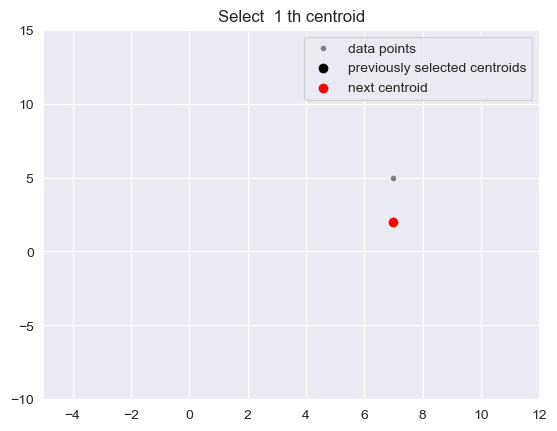

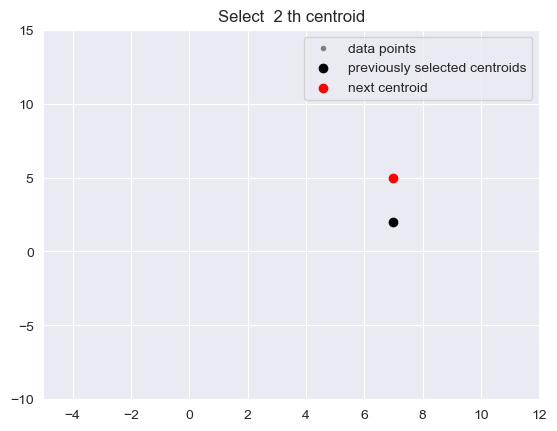

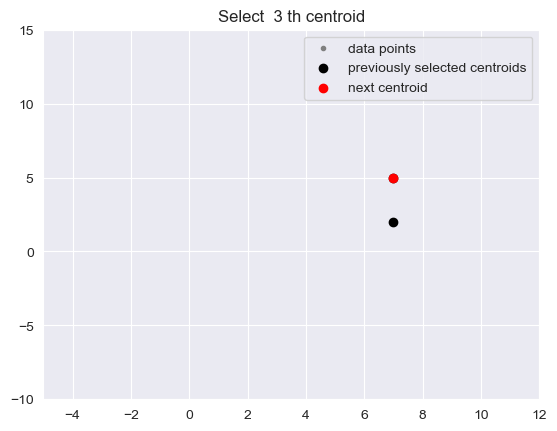

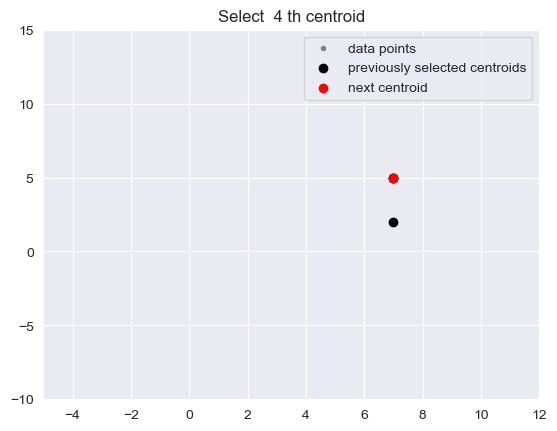

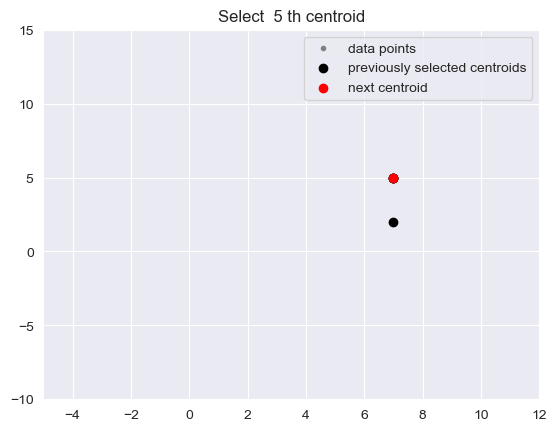

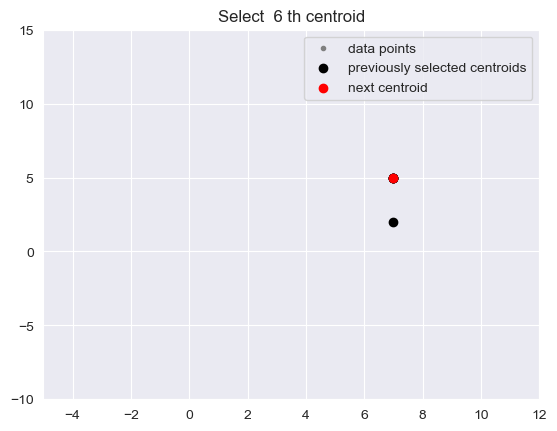

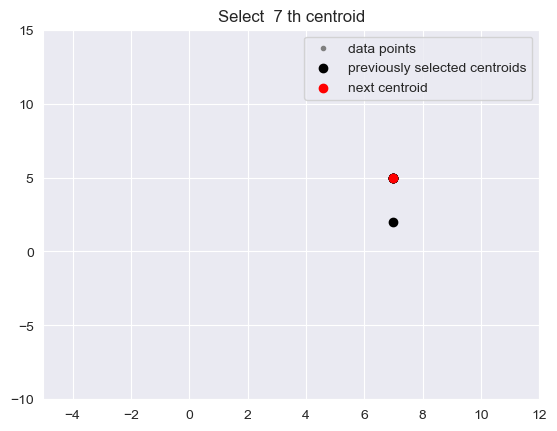

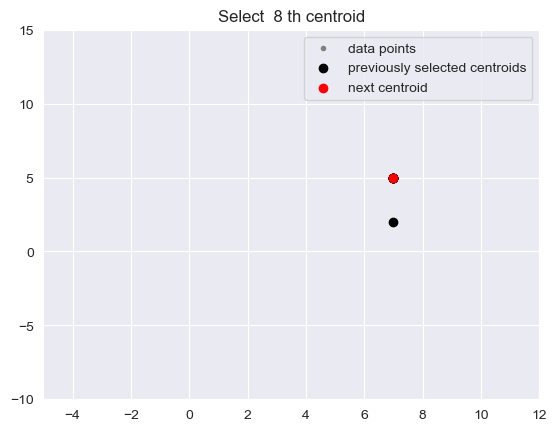

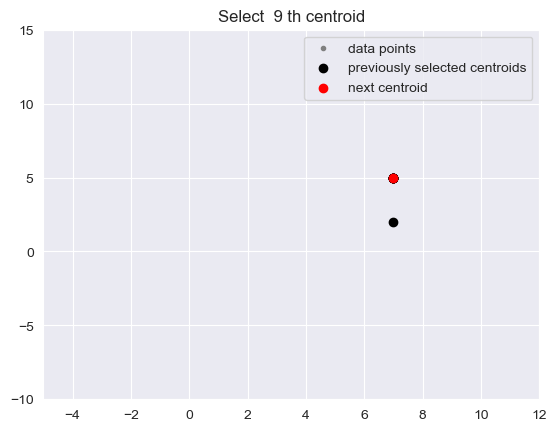

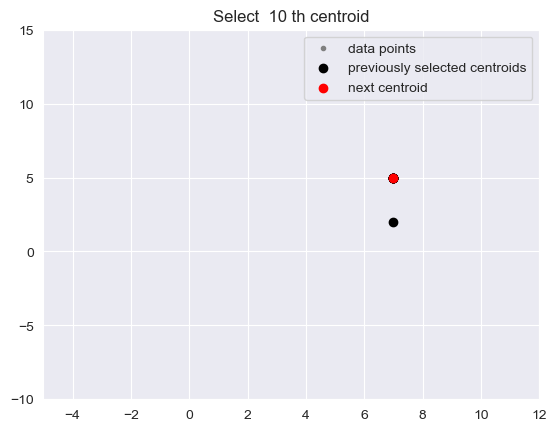

Centroids are: [array([7., 2., 1., ..., 4., 5., 6.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.]), array([7., 5., 2., ..., 7., 7., 9.])]
homogenity is: 0.4999911479619104
completeness is: 0.5036925379325861
v_masure is: 0.5024526671398919


In [27]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# creating data


data = np.vstack((X[:,0],y_pred))
np.random.shuffle(data)
print("Data is:",data)

# function to plot the selected centroids
def plot(data, centroids):
    plt.scatter(data[:, 0],data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color = 'black', label = 'previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color = 'red', label = 'next centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))

    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

# function to compute euclidean distance
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

# initialization algorithm
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))

    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):

        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids

# call the initialize function to get the centroids
centroids = initialize(data, k = 10)
print("Centroids are:",centroids)
homogenity,completeness,v_masure = sklearn.metrics.homogeneity_completeness_v_measure(X[:,0], y_pred, beta=2.0, )
print("homogenity is:",homogenity)
print("completeness is:",completeness)
print("v_masure is:",v_masure)

In [18]:
from sklearn.metrics.cluster import homogeneity_score
print("%.6f" % homogeneity_score(test_labels,y_pred))

0.499991
